<a href="https://colab.research.google.com/github/Mounika3112/credit-card-fraud-detection/blob/main/credit_card_fraud_detection_project_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install sklearn==0.24.2 imbalanced-learn numpy pandas matplotlib seaborn

ERROR: Could not find a version that satisfies the requirement sklearn==0.24.2 (from versions: 0.0, 0.0.post1, 0.0.post2, 0.0.post4, 0.0.post5)
ERROR: No matching distribution found for sklearn==0.24.2


In [20]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [21]:
#read the dataset
dataset = pd.read_csv("/content/creditcard.csv")
dataset.fillna(0,inplace=True)
# read the first 5 and last 5 rows of the data
dataset.head().append(dataset.tail())

<ipython-input-21-ff05f9f54299>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset.head().append(dataset.tail())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
196167,131385.0,0.117571,0.456780,-2.077266,-2.073220,0.408703,-2.275294,0.894539,-0.122748,-1.222025,...,0.698561,1.971647,-0.063868,0.085824,-1.041937,-0.126021,0.381036,0.293188,5.00,0.0
196168,131387.0,1.887546,-0.515073,-1.375326,0.219076,0.033817,-0.424882,0.109803,-0.223258,1.031596,...,0.132409,0.514453,-0.024536,0.686896,0.211164,0.159660,-0.040507,-0.040356,93.30,0.0
196169,131387.0,-0.341639,-1.244251,0.390240,-1.127744,-0.489407,-0.679562,0.250800,0.053157,1.704313,...,0.149890,0.255464,1.045243,-0.018635,-2.361446,0.037110,0.278248,0.389531,200.00,0.0
196170,131388.0,2.066743,0.256342,-2.145649,0.915330,1.063709,-0.432069,0.584642,-0.194476,-0.273594,...,0.131980,0.399313,-0.027681,0.197329,0.482546,-0.501574,-0.042849,-0.073935,1.50,0.0
196171,131388.0,-0.180122,0.935909,-0.355988,-0.597037,0.614762,-0.793247,0.902214,-0.077185,0.086829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0


**Data Exploration and Visualization**

Now we try to find out the relative proportion of valid and fraudulent credit card transactions:


Fraudulent Cases: 382
Valid Transactions: 195790
Proportion of Fraudulent Cases: 0.0019472707623921864


<Axes: ylabel=' '>

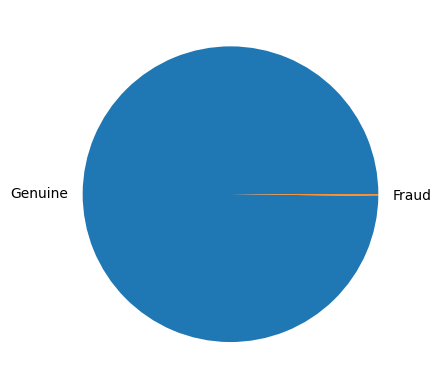

In [22]:
# check for relative proportion
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

# To see how small are the number of Fraud transactions
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

There is an imbalance in the data, with only 0.17% of the total cases being fraudulent.

<ipython-input-23-6bf6a44870b5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-23-6bf6a44870b5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either

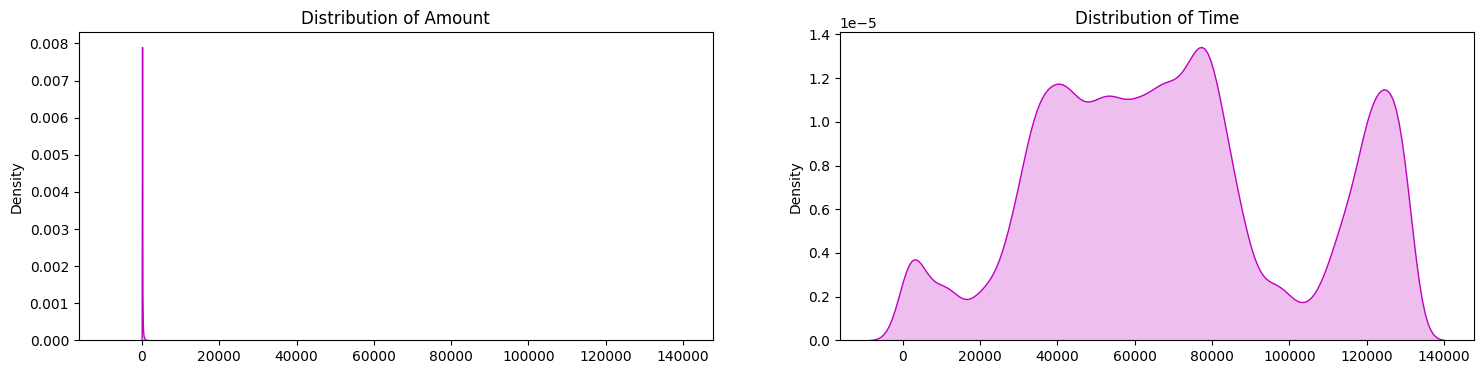

In [23]:
# plot the named features
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

amount_value = dataset['Amount'].values # values
time_value = dataset['Time'].values # values

sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')

plt.show()

Let us check if there is any difference between valid transactions and fraudulent transactions:


In [24]:
print("Average Amount in a Fraudulent Transaction: " + str(dataset[dataset["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(dataset[dataset["Class"] == 0]["Amount"].mean()))

Average Amount in a Fraudulent Transaction: 118.00960732984292
Average Amount in a Valid Transaction: 89.58190821798867


As we can notice from this, the average money transaction for the fraudulent ones is more. It makes this problem crucial to deal with. Now let us try to understand the distribution of values in each feature

In [25]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count    196172.000000
mean         89.637265
std         248.817910
min           0.000000
25%           5.990000
50%          22.950000
75%          79.077500
max       19656.530000
Name: Amount, dtype: float64


The rest of the features don't have any physical interpretation and will be seen through histograms. Here the values are subgrouped according to class (valid or fraud)

<ipython-input-26-6578539594db>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-26-6578539594db>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

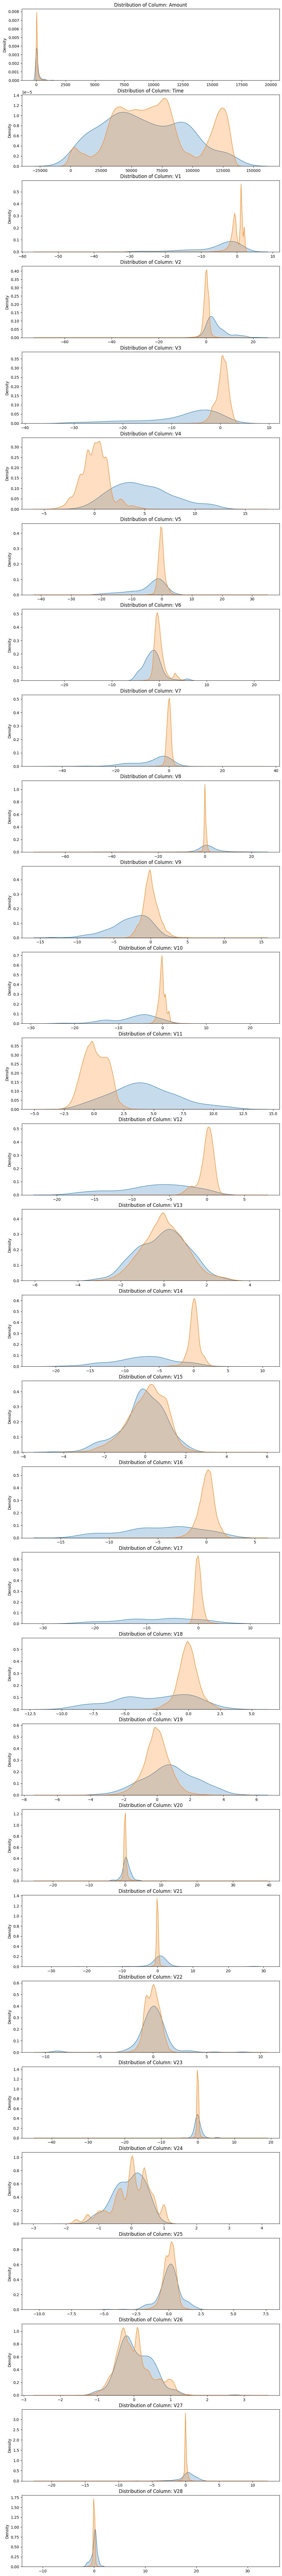

In [26]:
# Reorder the columns Amount, Time then the rest
data_plot = dataset.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)

# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

**Data Preparation**

Since the features are created using PCA, feature selection is unnecessary as many features are tiny. Let's see if there are any missing values in the dataset



In [27]:
# check for null values
dataset.isnull().shape[0]
print("Non-missing values: " + str(dataset.isnull().shape[0]))
print("Missing values: " + str(dataset.shape[0] - dataset.isnull().shape[0]))

Non-missing values: 196172
Missing values: 0


As there are no missing data, we turn to standardization. We standardize only Time and Amount using RobustScaler

In [28]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])

dataset.head().append(dataset.tail())

<ipython-input-28-0c03c5a915c0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset.head().append(dataset.tail())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.502748,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.733128,0.0
1,-1.502748,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.277202,0.0
2,-1.502725,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.866906,0.0
3,-1.502725,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.375748,0.0
4,-1.502703,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.643612,0.0
196167,1.465717,0.117571,0.456780,-2.077266,-2.073220,0.408703,-2.275294,0.894539,-0.122748,-1.222025,...,0.698561,1.971647,-0.063868,0.085824,-1.041937,-0.126021,0.381036,0.293188,-0.245596,0.0
196168,1.465762,1.887546,-0.515073,-1.375326,0.219076,0.033817,-0.424882,0.109803,-0.223258,1.031596,...,0.132409,0.514453,-0.024536,0.686896,0.211164,0.159660,-0.040507,-0.040356,0.962545,0.0
196169,1.465762,-0.341639,-1.244251,0.390240,-1.127744,-0.489407,-0.679562,0.250800,0.053157,1.704313,...,0.149890,0.255464,1.045243,-0.018635,-2.361446,0.037110,0.278248,0.389531,2.422439,0.0
196170,1.465785,2.066743,0.256342,-2.145649,0.915330,1.063709,-0.432069,0.584642,-0.194476,-0.273594,...,0.131980,0.399313,-0.027681,0.197329,0.482546,-0.501574,-0.042849,-0.073935,-0.293484,0.0
196171,1.465785,-0.180122,0.935909,-0.355988,-0.597037,0.614762,-0.793247,0.902214,-0.077185,0.086829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.314007,0.0


Next, let's divide the data into features and targets. We also make the train-test split of the data



In [29]:
# Separate response and features  Undersampling before cross validation will lead to overfiting
y = dataset["Class"] # target
X = dataset.iloc[:,0:30]

# Use SKLEARN for the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156937, 30), (39235, 30), (156937,), (39235,))

In [30]:
# Create the cross validation framework
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [31]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods.
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE.
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Building and Training the Model**

Let's run RandomForestClassifier on the dataset and see the performance

In [32]:
# Fit and predict
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy is", accuracy_score(y_test, y_pred))
print("The precision is", precision_score(y_test, y_pred))
print("The recall is", recall_score(y_test, y_pred))
print("The F1 score is", f1_score(y_test, y_pred))

The accuracy is 0.9996686631833822
The precision is 1.0
The recall is 0.8266666666666667
The F1 score is 0.9051094890510949


As you can see, we had only 0.17% fraud transactions, and a model predicting all transactions to be valid would have an accuracy of 99.83%. Luckily, our model exceeded that to over 99.96%.

As a result, accuracy isn't a suitable metric for our problem. There are three more

**Precision**: It is the total number of true positives divided by the true positives and false positives. Precision makes sure we don't spot good transactions as fraudulent in our problem.

**Recall**: It is the total number of true positives divided by the true positives and false negatives. Recall assures we don't predict fraudulent transactions as all good and therefore get good accuracy with a terrible model.

**F1 Score**: It is the harmonic mean of precision and recall. It makes a good average between both metrics.

The recall is more important than precision in our problem, as predicting a fraudulent transaction as good is worse than marking a good transaction as fraudulent, you can use fbeta_score() and adjust the beta parameter to make it more weighted towards recall.

In the upcoming sections, we will do a grid and randomized search on oversampling and undersampling on various classifiers.

**Undersampling**

In this section, we will perform undersampling to our dataset. One trivial point to note is that we will not undersample the testing data as we want our model to perform well with skewed class distributions.

The steps are as follows:

Use a 5-fold cross-validation on the training set.
On each of the folds, use undersampling.
Fit the model on the training folds and validate on the validation fold.

**NearMiss Methods**

Imbalanced-Learn is a Python module that assists in balancing datasets that are strongly skewed or biased towards certain classes. It aids in resampling classes that are usually oversampled or undersampled. If the imbalance ratio is higher, the output is slanted toward the class with the most samples. Look at this tutorial to learn more about the imbalanced-learn module.

Near Miss refers to a group of undersampling strategies that pick samples based on the distance between majority and minority class instances.

In the below code, we're making a flexible function that can perform grid or randomized search on a given estimator and its parameters with or without under/oversampling and returns the best estimator along with the performance metrics:

In [33]:
def get_model_best_estimator_and_metrics(estimator, params, kf=kf, X_train=X_train,
                                         y_train=y_train, X_test=X_test,
                                         y_test=y_test, is_grid_search=True,
                                         sampling=NearMiss(), scoring="f1",
                                         n_jobs=2):
    if sampling is None:
        # make the pipeline of only the estimator, just so the remaining code will work fine
        pipeline = make_pipeline(estimator)
    else:
        # make the pipeline of over/undersampling and estimator
        pipeline = make_pipeline(sampling, estimator)
    # get the estimator name
    estimator_name = estimator.__class__.__name__.lower()
    # construct the parameters for grid/random search cv
    new_params = {f'{estimator_name}__{key}': params[key] for key in params}
    if is_grid_search:
        # grid search instead of randomized search
        search = GridSearchCV(pipeline, param_grid=new_params, cv=kf, return_train_score=True, n_jobs=n_jobs, verbose=2)
    else:
        # randomized search
        search = RandomizedSearchCV(pipeline, param_distributions=new_params,
                                    cv=kf, scoring=scoring, return_train_score=True,
                                    n_jobs=n_jobs, verbose=1)
    # fit the model
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=scoring, cv=kf)
    # make predictions on the test data
    y_pred = search.best_estimator_.named_steps[estimator_name].predict(X_test)
    # calculate the metrics: recall, accuracy, F1 score, etc.
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.named_steps[estimator_name].predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    # return the best estimator along with the metrics
    return {
        "best_estimator": search.best_estimator_,
        "estimator_name": estimator_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }

Because there is never enough data to train your model, eliminating a portion of it for validation causes underfitting. We risk losing crucial patterns/trends in the dataset by lowering the training data, which increases the error caused by bias. So, we need a strategy that offers enough data for training the model while simultaneously leaving enough data for validation.

The cross_val_score() function uses cross-validation to determine a score, which we're using in the above function. Check this tutorial to learn more about this function

The function is made to be flexible. For example, if you want to perform a grid search on a LogisticRegression model with undersampling, you simply use this

In [35]:
# Cumulatively create a table for the ROC curve
## Create the dataframe
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

logreg_us_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'],
                  'C': [ 0.01, 0.1, 1, 100],
                  'solver' : ['liblinear']},
    sampling=NearMiss(),
)
print(f"==={logreg_us_results['estimator_name']}===")
print("Model:", logreg_us_results['best_estimator'])
print("Accuracy:", logreg_us_results['accuracy'])
print("Recall:", logreg_us_results['recall'])
print("F1 Score:", logreg_us_results['f1_score'])
res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],
                                        'fpr': logreg_us_results["fpr"],
                                        'tpr': logreg_us_results["tpr"],
                                        'auc': logreg_us_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
===logisticregression===
Model: Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=0.01, solver='liblinear'))])
Accuracy: 0.6209251943417867
Recall: 0.9333333333333333
F1 Score: 0.00932525144874442


<ipython-input-35-cd572649acd7>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_table = res_table.append({'classifiers': logreg_us_results["estimator_name"],


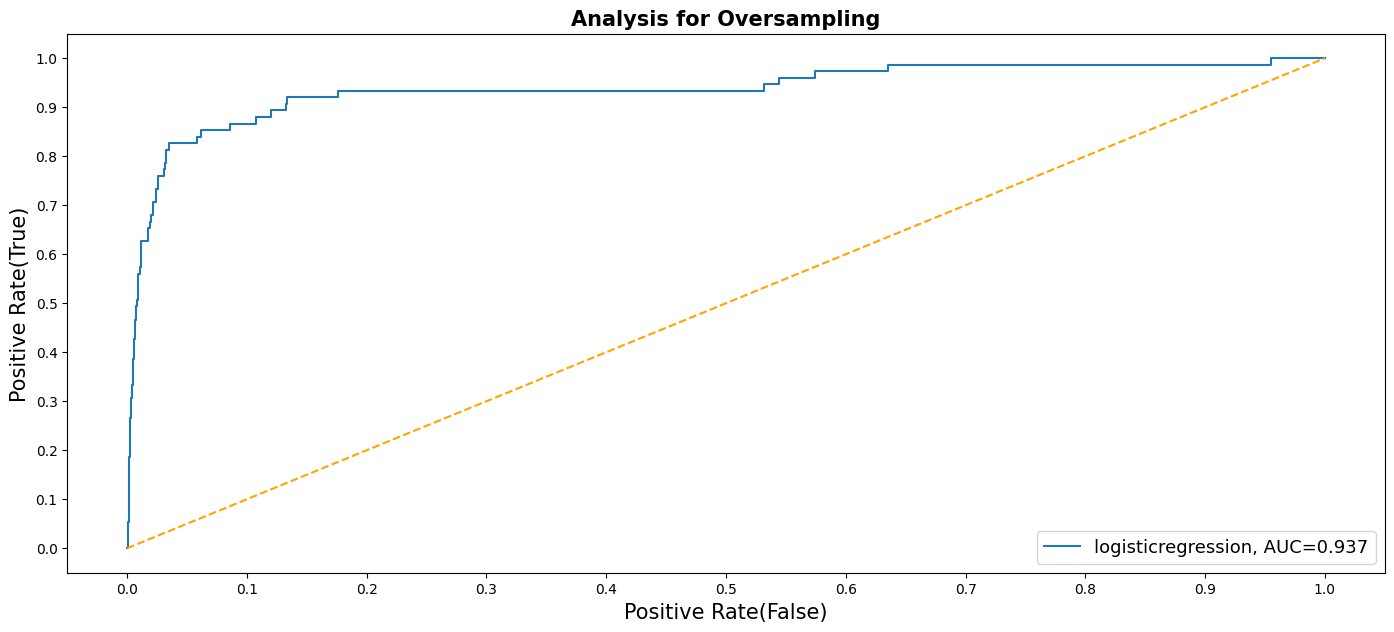

In [36]:
# Plot the ROC curve for undersampling
res_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(17,7))

for j in res_table.index:
    plt.plot(res_table.loc[j]['fpr'],
             res_table.loc[j]['tpr'],
             label="{}, AUC={:.3f}".format(j, res_table.loc[j]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate(False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate(True)", fontsize=15)
plt.title('Analysis for Oversampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

**Oversampling with SMOTE**

One issue with unbalanced classification is that there are too few samples of the minority class for a model to learn the decision boundary successfully. Oversampling instances from the minority class is one solution to the issue. Before fitting a model, we duplicate samples from the minority class in the training set.

Synthesizing new instances from the minority class is an improvement over replicating examples from the minority class. It is a particularly efficient type of data augmentation for tabular data. This paper demonstrates that a combination of oversampling the minority class and undersampling the majority class may improve the classifier performance.

Similarly, you can pass SMOTE() to the sampling parameter on our function for oversampling

In [38]:
# Cumulatively create a table for the ROC curve
res_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

lin_reg_os_results = get_model_best_estimator_and_metrics(
    estimator=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100],
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    scoring="f1",
    is_grid_search=False,
    n_jobs=2,
)
print(f"==={lin_reg_os_results['estimator_name']}===")
print("Model:", lin_reg_os_results['best_estimator'])
print("Accuracy:", lin_reg_os_results['accuracy'])
print("Recall:", lin_reg_os_results['recall'])
print("F1 Score:", lin_reg_os_results['f1_score'])
res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],
                                        'fpr': lin_reg_os_results["fpr"],
                                        'tpr': lin_reg_os_results["tpr"],
                                        'auc': lin_reg_os_results["auc"]
                              }, ignore_index=True)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
===logisticregression===
Model: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=100, solver='liblinear'))])
Accuracy: 0.9745890149101567
Recall: 0.8933333333333333
F1 Score: 0.11847922192749778


<ipython-input-38-f34172dc5ca5>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_table = res_table.append({'classifiers': lin_reg_os_results["estimator_name"],


Notice we set is_grid_search to False as we know this will take a very long time, so we use RandomizedSearchCV. Consider increasing n_jobs to more than two if you have a higher number of cores (Currently, a Google Colab instance has only 2 CPU cores).

**Appendix: Outlier Detection and Removal**

The outlier presence sometimes affects the model and might lead us to wrong conclusions. Therefore, we must look at the data distribution while keeping a close eye on the outliers. This section of this tutorial uses the Interquartile Range (IQR) method to identify and remove the outliers

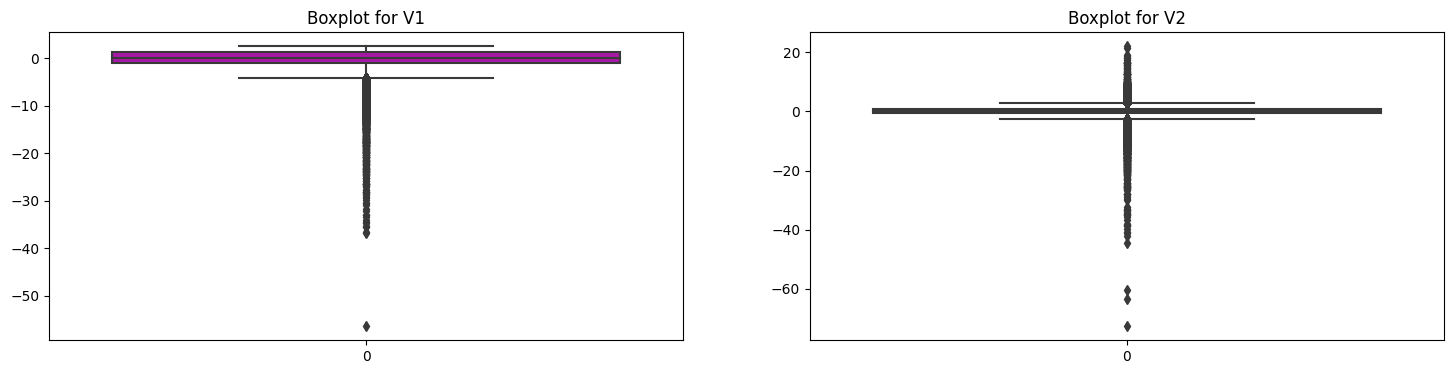

In [39]:
# boxplot for two example variables in the dataset

f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)

variable1 = dataset["V1"]
variable2 = dataset["V2"]

sns.boxplot(variable1, color="m", ax=axes[0]).set_title('Boxplot for V1')
sns.boxplot(variable2, color="m", ax=axes[1]).set_title('Boxplot for V2')

plt.show()

In [40]:
# Find the IQR for all the feature variables
# Please note that we are keeping Class variable also in this evaluation, though we know using this method no observation
# be removed based on this variable.

quartile1 = dataset.quantile(0.25)
quartile3 = dataset.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

Time      1.000000
V1        2.175306
V2        1.362725
V3        1.538511
V4        1.681100
V5        1.244199
V6        1.153656
V7        1.073958
V8        0.518544
V9        1.291767
V10       0.959716
V11       1.538215
V12       1.096764
V13       1.352878
V14       0.877373
V15       1.279426
V16       1.006662
V17       0.862039
V18       0.975275
V19       0.961706
V20       0.343911
V21       0.376142
V22       0.956250
V23       0.282248
V24       0.761937
V25       0.622041
V26       0.594107
V27       0.156353
V28       0.118850
Amount    1.000000
Class     0.000000
dtype: float64


Now that we have the Interquartile range for each variable, we remove the observations with outlier values. We have used "outlier constant" to be 3

In [41]:
# Remove the outliers
constant = 3
datavalid = dataset[~((dataset < (quartile1 - constant * IQR)) |(dataset > (quartile3 + constant * IQR))).any(axis=1)]
deletedrows = dataset.shape[0] - datavalid.shape[0]
print("We have removed " + str(deletedrows) + " rows from the data as outliers")

We have removed 37785 rows from the data as outliers
